In [ ]:
#Задача: Завантажте датасет ірисів (вбудований датасет) за допомогою Pandas і використовуючи Tensorflow, навчіть модель класифікації квітів ірису.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 782ms/step - accuracy: 0.5391 - loss: 1.0342 - val_accuracy: 0.4167 - val_loss: 1.1038
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.6289 - loss: 0.9571 - val_accuracy: 0.4167 - val_loss: 1.0436
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6576 - loss: 0.9113 - val_accuracy: 0.4583 - val_loss: 0.9875
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6576 - loss: 0.8763 - val_accuracy: 0.5833 - val_loss: 0.9324
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7539 - loss: 0.8353 - val_accuracy: 0.6250 - val_loss: 0.8799
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8112 - loss: 0.7874 - val_accuracy: 0.7500 - val_loss: 0.8320
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8268 - loss: 0.7485 - val_accuracy: 0.8333 - val_loss: 0.7869
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.7943 - loss: 0.6978 - val_accuracy: 0.9167 - val

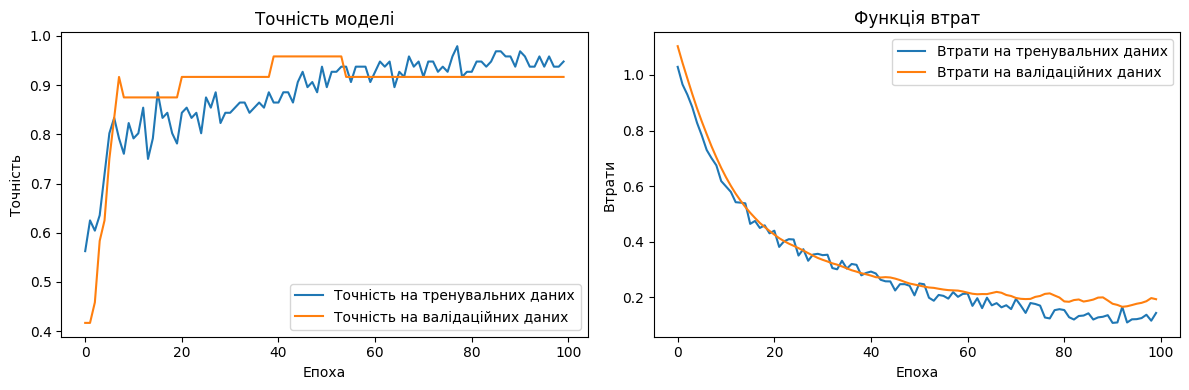

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Звіт про класифікацію:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [1]:
# Імпортуємо необхідні бібліотеки
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантажуємо вбудований датасет ірисів
from sklearn.datasets import load_iris
iris = load_iris()

# Створюємо DataFrame з даних
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Розділяємо дані на ознаки (X) та цільову змінну (y)
X = df.drop('target', axis=1)
y = df['target']

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизуємо дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Конвертуємо цільову змінну у категоріальний формат
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

# Створюємо модель
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Компілюємо модель
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Навчаємо модель
history = model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Оцінюємо модель на тестових даних
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f'\nТочність на тестових даних: {test_accuracy:.4f}')

# Візуалізуємо результати навчання
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

# Графік функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

# Робимо передбачення на тестових даних
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Виводимо звіт про класифікацію
from sklearn.metrics import classification_report
print('\nЗвіт про класифікацію:')
print(classification_report(y_test, predicted_classes, target_names=iris.target_names))